# Problem Statement

- In this case study, you have been provided with images of traffic signs and the goal is to train a Deep Network to classify them
- The dataset contains 43 different classes of images. 
- Classes are as listed below: 

    - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
    - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
    - ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
    - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
    - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
    - (10, b'No passing for vehicles over 3.5 metric tons')
    - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
    - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
    - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
    - (18, b'General caution') (19, b'Dangerous curve to the left')
    - (20, b'Dangerous curve to the right') (21, b'Double curve')
    - (22, b'Bumpy road') (23, b'Slippery road')
    - (24, b'Road narrows on the right') (25, b'Road work')
    - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
    - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
    - (31, b'Wild animals crossing')
    - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
    - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
    - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
    - (40, b'Roundabout mandatory') (41, b'End of no passing')
    - (42, b'End of no passing by vehicles over 3.5 metric tons')

- The network used is called Le-Net that was presented by Yann LeCun
http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Loading the data

In [2]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open("train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train,y_train = train['features'],train['labels']
X_validation,y_validation = valid['features'],valid['labels']
X_test,y_test = test['features'],test['labels']

In [4]:
X_train.shape

(34799, 32, 32, 3)

So we have 34799 images each consisting of 32 by 32 pixel dimension with RGB mode.

In [5]:
y_train.shape

(34799,)

Training data has 34799 images . Each image with its repective class.

In [6]:
X_test.shape

(12630, 32, 32, 3)

In [7]:
y_test.shape

(12630,)

In [8]:
X_validation.shape

(4410, 32, 32, 3)

In [9]:
y_validation.shape

(4410,)

# Data Exploration

31

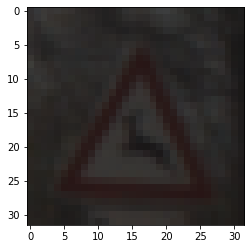

In [10]:
i = 234
plt.imshow(X_train[i]) #will show the image
y_train[i] #this will show to which class does the image belongs

- Wild Animals Crossing


9

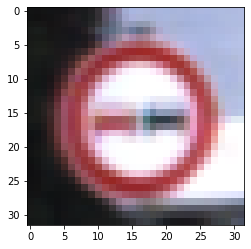

In [11]:
i = 12232
plt.imshow(X_train[i])
y_train[i]

- No passing

41

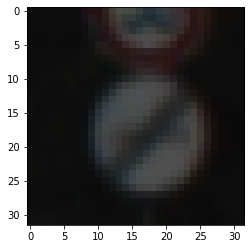

In [12]:
i = 1
plt.imshow(X_validation[i])
y_validation[i]

# Data Preperation

In [13]:
from sklearn.utils import shuffle

In [14]:
X_train,y_train = shuffle(X_train,y_train)

In [15]:
X_train_gray = np.sum(X_train/3,axis=3,keepdims=True) #While keeping the dimensions same, we are averaging the 3 colours RGB into one.

In [16]:
X_train_gray.shape #now the dimension is 32 by 32 by 1.


(34799, 32, 32, 1)

In [17]:
X_test_gray = np.sum(X_test/3,axis=3,keepdims=True)
X_validation_gray = np.sum(X_validation/3,axis=3,keepdims=True)

In [18]:
X_test_gray.shape

(12630, 32, 32, 1)

In [19]:
X_validation_gray.shape

(4410, 32, 32, 1)

So the dimns have been reduced to 32 by 32 by 1.

Normalisation

In [20]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [21]:
X_train_gray_norm

array([[[[-0.83854167],
         [-0.8359375 ],
         [-0.83333333],
         ...,
         [-0.8828125 ],
         [-0.88541667],
         [-0.88541667]],

        [[-0.84114583],
         [-0.828125  ],
         [-0.80989583],
         ...,
         [-0.8828125 ],
         [-0.88020833],
         [-0.87760417]],

        [[-0.84895833],
         [-0.828125  ],
         [-0.80729167],
         ...,
         [-0.88802083],
         [-0.87760417],
         [-0.86197917]],

        ...,

        [[-0.8671875 ],
         [-0.86979167],
         [-0.859375  ],
         ...,
         [-0.89583333],
         [-0.8984375 ],
         [-0.88020833]],

        [[-0.87760417],
         [-0.875     ],
         [-0.86979167],
         ...,
         [-0.89322917],
         [-0.89322917],
         [-0.890625  ]],

        [[-0.8828125 ],
         [-0.88541667],
         [-0.87760417],
         ...,
         [-0.88020833],
         [-0.89322917],
         [-0.88802083]]],


       [[[ 0.3359375 ],


So we have normalised the pixels such that they range from -1 to 1.

Lets see if we have preserved the actual features of image or not.

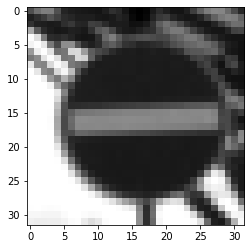

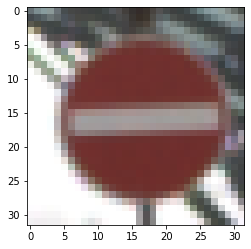

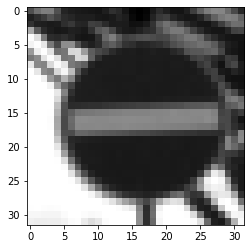

In [22]:
i = 300
plt.imshow(X_train_gray[i].squeeze(),cmap='gray')#we use squeeze becuase we dont want the dimns to be 32 by 32 by 1 but 32 by 32. 1 makes no sense here..
y_train[i]
plt.figure() #create new image
plt.imshow(X_train[i]) #actual image
plt.figure()
plt.imshow(X_train_gray[i].squeeze(),cmap='gray')


# Model Training

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,AveragePooling2D,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [24]:
cnn_model = Sequential()

In [25]:
cnn_model.add(Conv2D(filters = 6,kernel_size = (5,5),activation = 'relu',input_shape =(32,32,1))) #filters represent the depth,kernal size is size of filer layer,input shape is dimns of the input image
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters = 16,kernel_size = (5,5),activation = 'relu')) #filters represent the depth,kernal size is size of filer layer,input shape is dimns of the input image
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())
#creating an artificial neural network
cnn_model.add(Dense(120,activation='relu'))
cnn_model.add(Dense(84,activation='relu'))
cnn_model.add(Dense(43,activation='softmax')) #output - hence 43 neurons corresponding to 43 classes


              

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [26]:
cnn_model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [27]:
history = cnn_model.fit(X_train_gray_norm,y_train,batch_size=500,nb_epoch = 20,verbose=1,validation_data=(X_validation_gray_norm,y_validation))

Train on 34799 samples, validate on 4410 samples
Epoch 1/20
34799/34799 [==============================] - 12s 358us/sample - loss: 3.1173 - acc: 0.2026 - val_loss: 2.5760 - val_acc: 0.3612
Epoch 2/20
34799/34799 [==============================] - 11s 328us/sample - loss: 1.5545 - acc: 0.5729 - val_loss: 1.3289 - val_acc: 0.6249
Epoch 3/20
34799/34799 [==============================] - 12s 336us/sample - loss: 0.8620 - acc: 0.7582 - val_loss: 0.9388 - val_acc: 0.7315
Epoch 4/20
34799/34799 [==============================] - 12s 340us/sample - loss: 0.6071 - acc: 0.8338 - val_loss: 0.7995 - val_acc: 0.7712
Epoch 5/20
34799/34799 [==============================] - 12s 331us/sample - loss: 0.4734 - acc: 0.8742 - val_loss: 0.6927 - val_acc: 0.7989
Epoch 6/20
34799/34799 [==============================] - 12s 333us/sample - loss: 0.3901 - acc: 0.8970 - val_loss: 0.6385 - val_acc: 0.8098
Epoch 7/20
34799/34799 [==============================] - 12s 338us/sample - loss: 0.3167 - acc: 0.9175 -

# Model Evalution

In [28]:
score = cnn_model.evaluate(X_test_gray_norm,y_test)
print('Test Accuracy:{}'.format(score[1]))

12630/12630 [==============================] - 3s 255us/sample - loss: 0.8965 - acc: 0.8538
Test Accuracy:0.8538400530815125


In [29]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [30]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

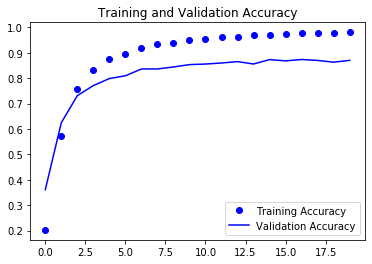

In [35]:
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'bo',label = 'Training Accuracy')
plt.plot(epochs,val_accuracy,'b',label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

Here validation accuracy is low beacuse the model was exposed to the data(validation data) which is totally new to it. Hence less acccuracy than the one achived during training.

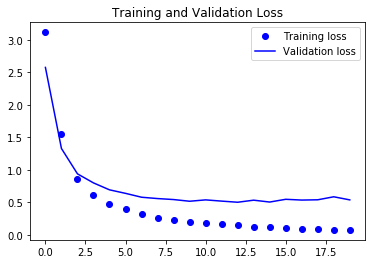

In [36]:
epochs = range(len(loss))
plt.plot(epochs,loss,'bo',label = 'Training loss')
plt.plot(epochs,val_loss,'b',label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

In [39]:
prediction = cnn_model.predict_classes(X_test_gray_norm)

In [40]:
from sklearn.metrics import confusion_matrix

In [42]:
cm = confusion_matrix(y_test,prediction)

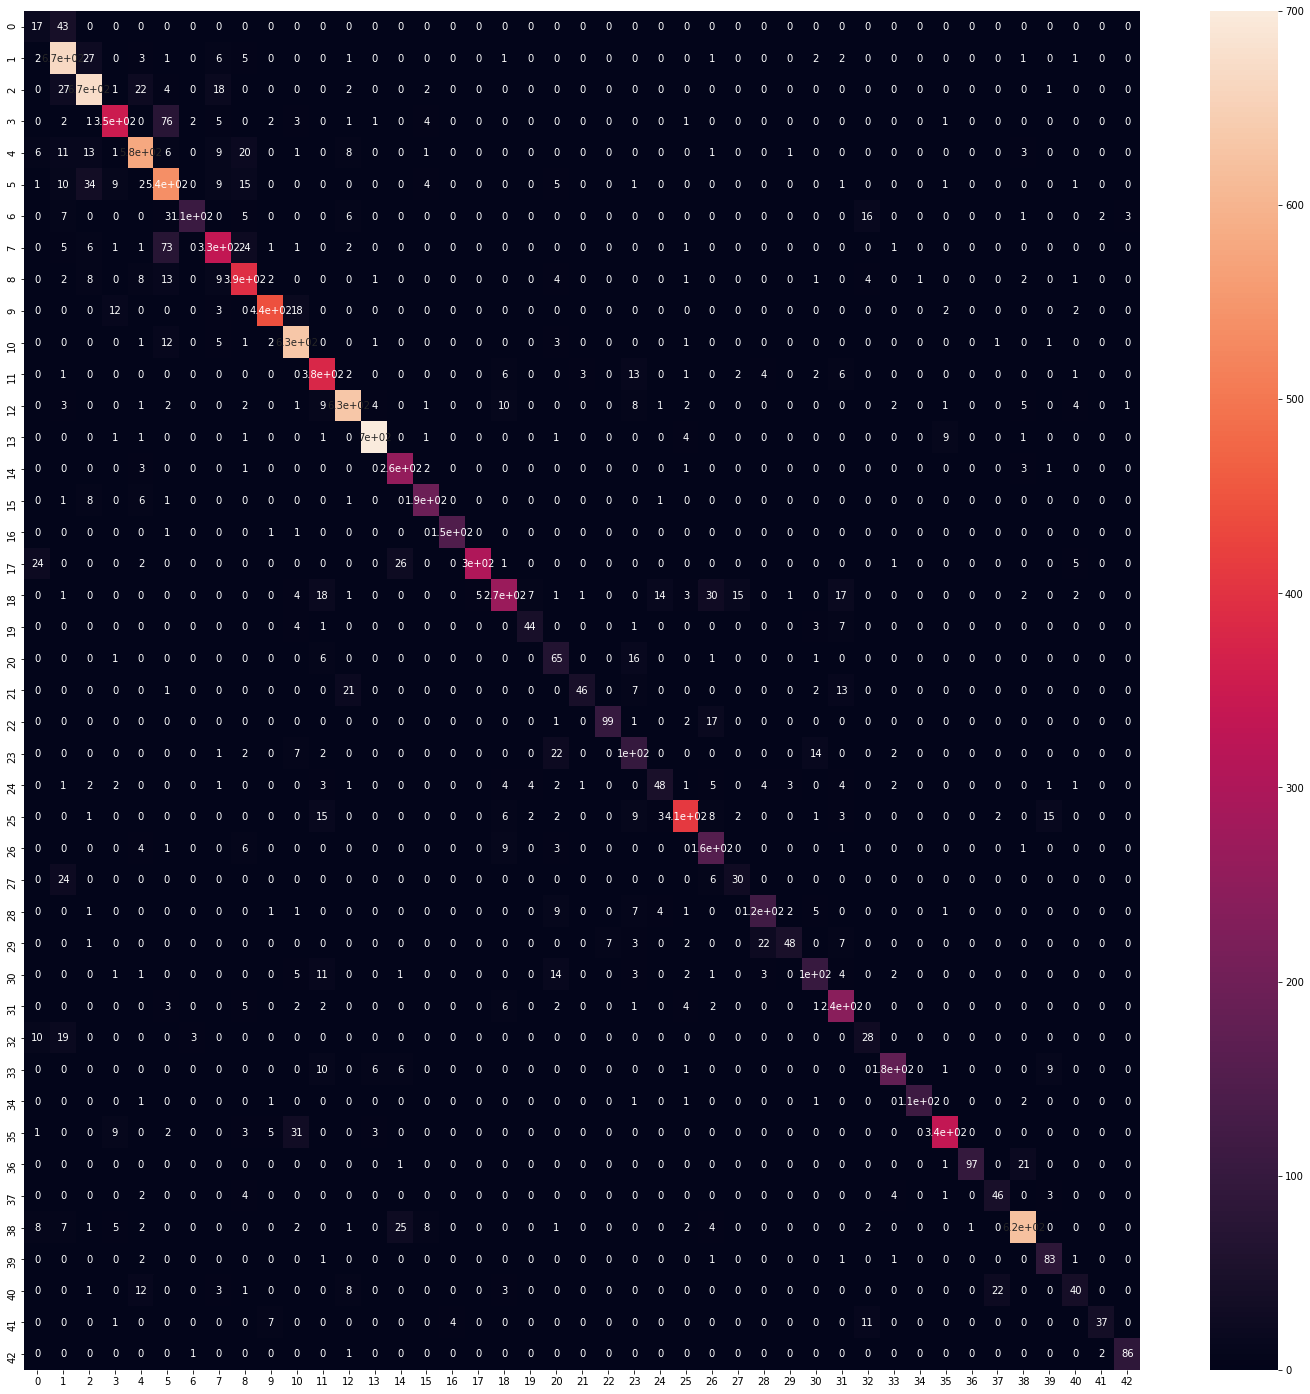

In [45]:
plt.figure(figsize=(25,25))
sns.heatmap(cm,annot=True)

The diagonally represented numbers show the number of correct predicted images of the corresponding class!

# Looks Great!

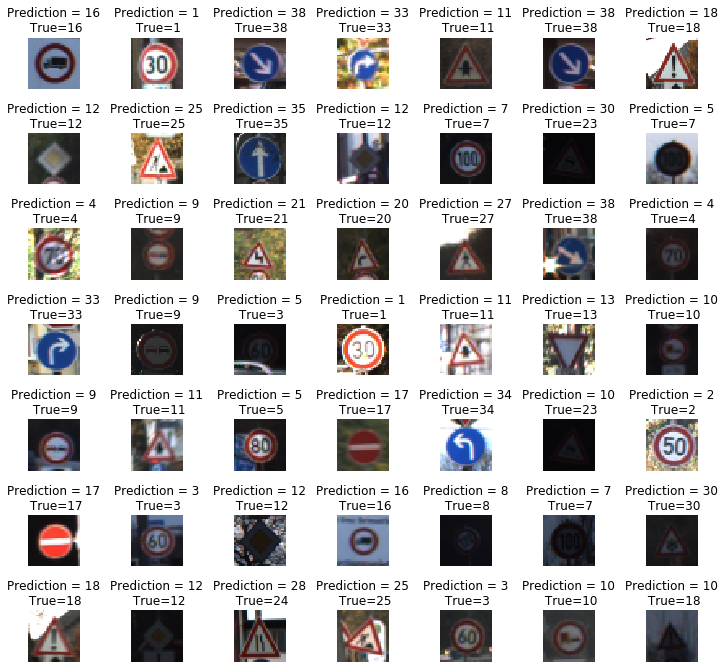

In [53]:
L = 7
W = 7
fig,axes = plt.subplots(l,w,figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True={}'.format(prediction[i],y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=1)

# Done!